# IBM - Applied Data Science Capstone

##### Capstone Project – Battle of the Neighborhoods


## Airbnb properties in District of Porto, Portugal

## Introduction

Airbnb is an online-based company that connects people looking for accommodation (Airbnb guests) to people looking to rent their properties (Airbnb hosts) on a short-term or long-term basis. The rentals properties include apartments (dominant), homes, boats, and whole lot more. Renters are presented with a good selection of listings and can filter by criteria like price, number of bedrooms, room type, and more. 


A person is planning to spend a month or two in the District of Porto (Portugal) and is looking for a reasonable accommodation from Airbnb. In addition, the accommodation must be in a great location, considering the proximity to bakeries, restaurants and cafes.


This project aims to solve this problem, by conducting some exploratory data analysis using the Foursquare API and the Airbnb list of properties. 


The criteria of the person are:


-	Entire home/apt


-	Neighborhood with mean price by night bellow $100


-	Properties in neighborhoods that presents a good offer of Café, Bakery and Restaurant 


-	The most common type of properties in the selected neighborhoods


-	Only properties with review score rating equal 100


-	Properties that accommodate 3 persons with 2 bedrooms 


## Dataset

The dataset used for this project comes from Inside Airbnb: http://insideairbnb.com/get-the-data.html. The dataset that was employed was named listings.csv; it is a detailed data set with 106 attributes, a few of the attributes being: price per day (which will hereafter be simply referred to as price), number of beds, property. The data contains a total of 12,005. The data contains a total of 12,005. Each row in the data set is a listing available for rental in Airbnb’s site. The columns describe different characteristics of each listing (features).

Some of the more important features this project will look into are the following:

-	accommodates: the number of guests the rental can accommodate

-	bedrooms: number of bedrooms included in the rental

-	bathrooms: number of bathrooms included in the rental

-	beds: number of beds included in the rental

-	price: nightly price for the rental

-	minimum_nights: minimum number of nights a guest can stay for the rental

-	maximum_nights: maximum number of nights a guest can stay for the rental

-	review_scores_rating: score of reviews that previous guests have left


The geographic dataset named neighborhood.geoson (available in Inside Airbnb) was used to create exploratory maps of the location.

I’ve used the Foursquare API to explore neighborhoods in the District of Porto. The Foursquare explore function will be used to get the most common venue categories in each neighborhood. The following information are retrieved:

-	Venue ID

-	Venue Name

-	Coordinates

-	Categories Name


In [2]:
#Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

import folium

from nltk.probability import FreqDist

import requests

### Dataset

In [3]:
df_all = pd.read_csv('listings-2.csv')
df = df_all
df.head()


/anaconda3/envs/datascience/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                         listing_url       scrape_id last_scraped  \
0  41339  https://www.airbnb.com/rooms/41339  20200321155050   2020-03-21   
1  55111  https://www.airbnb.com/rooms/55111  20200321155050   2020-03-21   
2  70925  https://www.airbnb.com/rooms/70925  20200321155050   2020-03-21   
3  73828  https://www.airbnb.com/rooms/73828  20200321155050   2020-03-21   
4  76436  https://www.airbnb.com/rooms/76436  20200321155050   2020-03-21   

                                                name  \
0                       Porto city flat near the sea   
1  Fontielas Houses |Floor1 in House with shared ...   
2                  APARTMENT WITH THE BEST CITY VIEW   
3  Fontielas Houses |Floor0 in House with shared ...   
4                             Go2oporto @ River Side   

                                             summary  \
0  Here you'll find all you need for your holiday...   
1  First Floor in House with shared Swimingpool a...   
2   Two separate bedrooms are an undeniable advan...   
3  Piso no rés-do-chão em moradia com piscina par...   
4  Elegant and modern apartment, facing south in ...   

                                               space  \
0  Apartment facing Southeast, with a big bedroom...   
1  The first floor in house with shared pool.   I...   
2  Apartment with the best view of the Porto city...   
3  The first floor in house with shared pool.  Ou...   
4  Comfortable space, in one of the most beautifu...   

                                         description experiences_offered  \
0  Here you'll find all you need for your holiday...                none   
1  First Floor in House with shared Swimingpool a...                none   
2   Two separate bedrooms are an undeniable advan...                none   
3  Piso no rés-do-chão em moradia com piscina par...                none   
4  Elegant and modern apartment, facing south in ...                none   

                               neighborhood_overview  ... instant_bookable  \
0  In the surrounds you have Serralves Museum and...  ...                t   
1                                                NaN  ...                f   
2  The house is near of the supermarkets, the Dou...  ...                f   
3                                                NaN  ...                f   
4  In this area, you can enjoy breakfast in one o...  ...                t   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f                     moderate   
2                        f  strict_14_with_grace_period   
3                        f                     moderate   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               1   
1                               3   
2                               2   
3                               3   
4                              20   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            3   
2                                            2   
3                                            3   
4                                           17   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            3   

   calculated_hos

In [522]:
#Select only the columns usefull for this analysis

df = df[['id',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'zipcode',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cancellation_policy']]

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12005 entries, 0 to 12004
Data columns (total 26 columns):
id                              12005 non-null int64
neighbourhood_cleansed          12005 non-null object
neighbourhood_group_cleansed    12005 non-null object
city                            11899 non-null object
zipcode                         11634 non-null object
latitude                        12005 non-null float64
longitude                       12005 non-null float64
property_type                   12005 non-null object
room_type                       12005 non-null object
accommodates                    12005 non-null int64
bathrooms                       12001 non-null float64
bedrooms                        12000 non-null float64
beds                            11948 non-null float64
price                           12005 non-null object
guests_included                 12005 non-null int64
extra_people                    12005 non-null object
minimum_nights           

One of the criteria is not share a property.

So, only properties with 'room_type' equal 'Entire home/apt'were selected.

In [524]:
df = df[df['room_type'] == 'Entire home/apt']
df.shape

(9285, 26)

In [525]:
#Data preprocessing

p = df['price'].str.replace('$','')
p = p.str.replace(',','')
p = pd.to_numeric(p, errors='coerce')
df['price'] = p
a = df['extra_people'].str.replace('$','')
a = a.str.replace(',','')
a = pd.to_numeric(a, errors='coerce')
df['extra_people'] = a


In [526]:
df.rename(columns={'neighbourhood_group_cleansed':'neighbourhood_group'}, inplace=True)

In [527]:
df_prices = df.groupby(['neighbourhood_group'])['price'].mean().reset_index()
df_prices

neighbourhood_group       price
0                 AROUCA  126.646154
1                ESPINHO   86.857143
2               GONDOMAR  115.815217
3                   MAIA   87.116667
4             MATOSINHOS   77.286533
5    OLIVEIRA DE AZEMÉIS   69.050000
6                PAREDES   99.843750
7                  PORTO   83.513510
8        PÓVOA DE VARZIM   85.771845
9   SANTA MARIA DA FEIRA   73.200000
10           SANTO TIRSO  145.000000
11   SÃO JOÃO DA MADEIRA   50.000000
12                 TROFA  102.000000
13        VALE DE CAMBRA  119.086957
14               VALONGO   65.952381
15         VILA DO CONDE   98.531401
16     VILA NOVA DE GAIA   95.137026

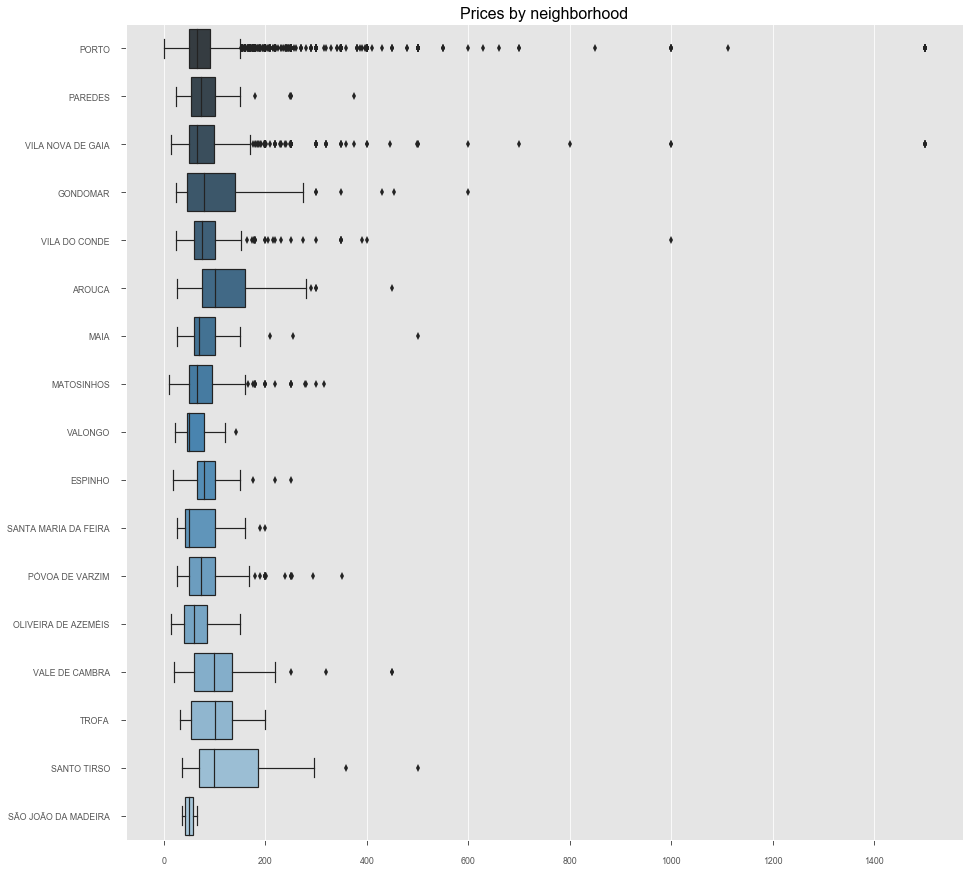

In [531]:
plt.figure(figsize=(15,15))
sns.boxplot(x='price', y='neighbourhood_group', data=df, palette="Blues_d")
plt.xlabel('')
plt.ylabel('')
plt.title('Prices by neighborhood', fontsize=16)
plt.show()

<Figure size 1800x720 with 0 Axes>

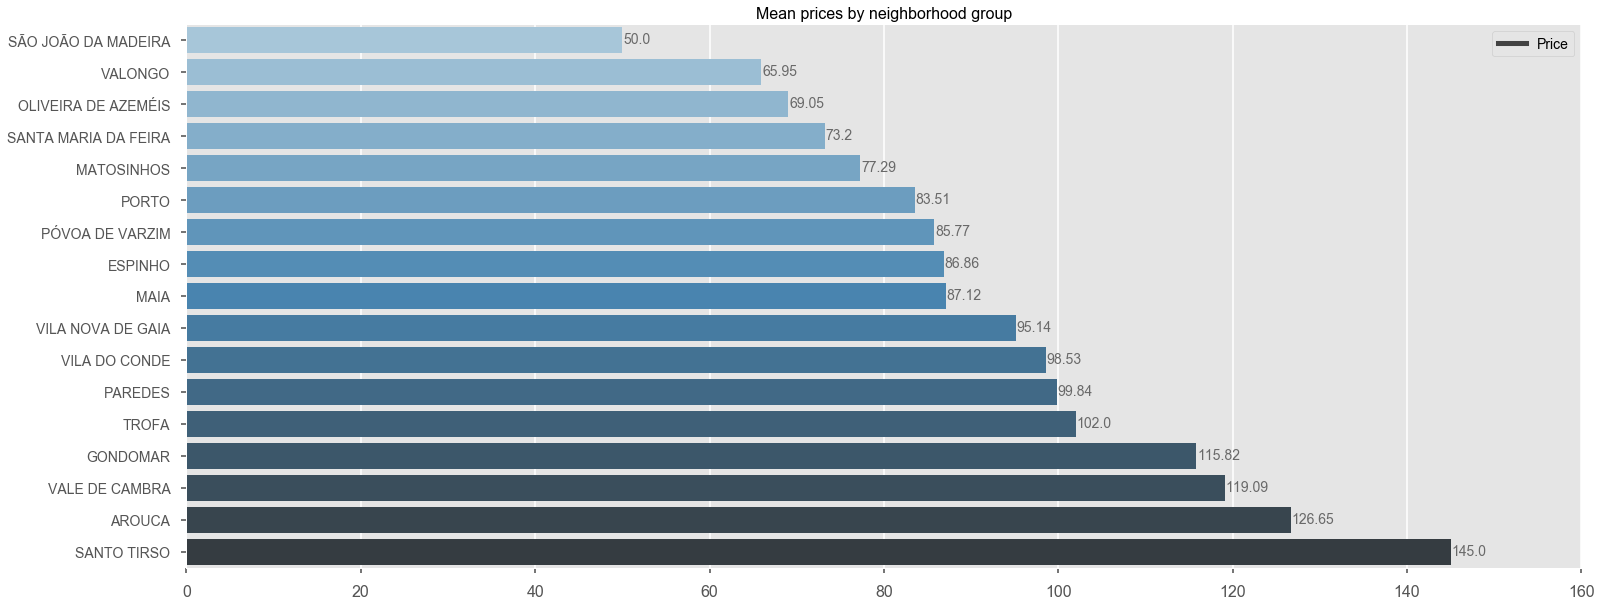

In [532]:
plt.figure(figsize=(25,10))

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
plt.rcParams['font.family'] = "arial"
plt.figure(figsize=(25,10))

df_prices = df_prices.sort_values('price', ascending=False)

ax = sns.barplot(y= "neighbourhood_group", x = "price", data = df_prices, palette=("Blues_d"))
sns.set_context("paper")

ax.set_alpha(0.8)
ax.set_title("Mean prices by neighborhood group", fontsize=16)
ax.set_yticklabels(df_prices['neighbourhood_group'], fontsize=14)
ax.set_xlim([0,160])
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(['Price'], fontsize=14)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


The neighborhood with mean prices bellow 100 were selected.

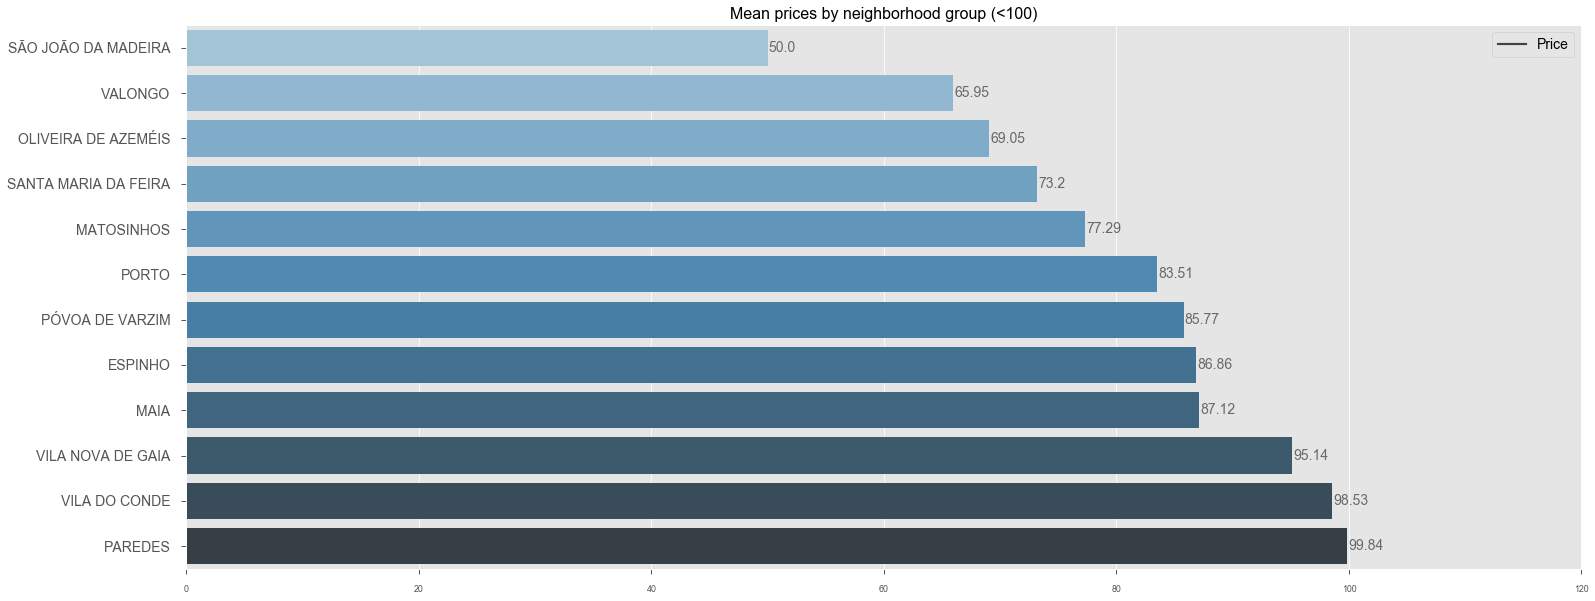

In [534]:
plt.figure(figsize=(25,10))

df_prices2 = df_prices[df_prices['price']<100]

ax = sns.barplot(y= "neighbourhood_group", x = "price", data = df_prices2, palette=("Blues_d"))

ax.set_alpha(0.8)
ax.set_title("Mean prices by neighborhood group (<100)", fontsize=16)
ax.set_yticklabels(df_prices2['neighbourhood_group'], fontsize=14)
ax.set_xlim([0,120])
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(['Price'], fontsize=14)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

The geographic data neighbourhood.geojson comprises the polygons of the neighborhood from District of Porto.

In [535]:
world_geo ='neighbourhoods.geojson' 
latitude = 41.1496086
longitude = -8.6109896
porto_map = folium.Map(location=[latitude, longitude], zoom_start=9)

A geographic map showing the mean prices scale by neighborhood:

In [536]:
# generate choropleth map

porto_map.choropleth(
    geo_data=world_geo,
    data=df_prices,
    columns=['neighbourhood_group', 'price'],
    key_on='feature.properties.neighbourhood_group',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Price by neighborhood'
)

porto_map

Analysing the frequency distribution of the properties type.

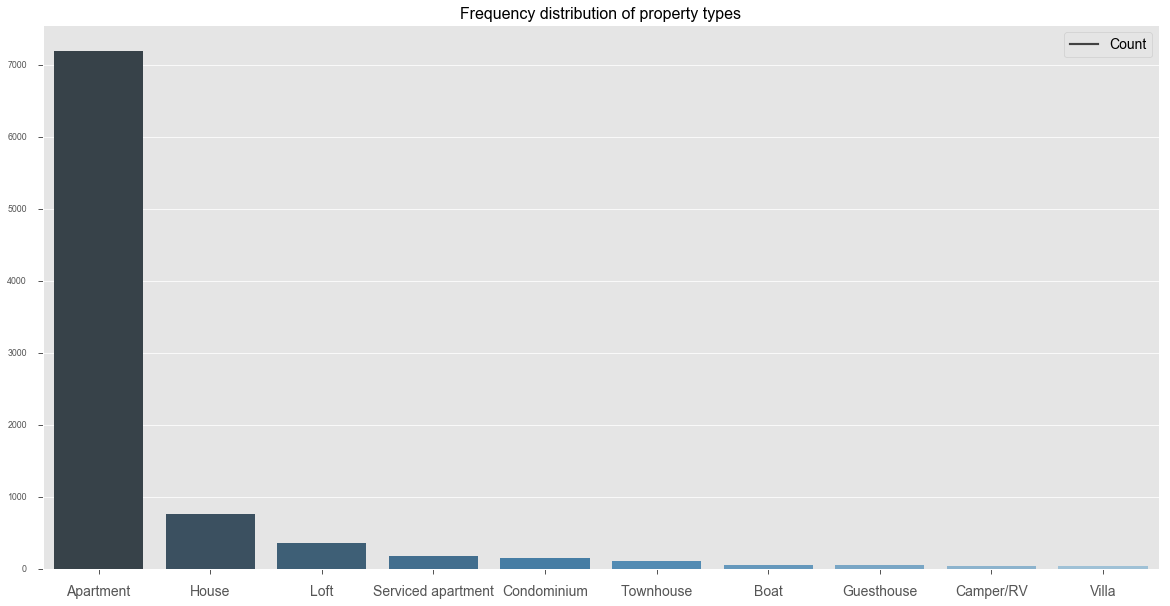

In [538]:
df_prop = df.loc[df['neighbourhood_group'].isin(df_prices2['neighbourhood_group'])]

properties=df_prop['property_type'].tolist()
fdist = FreqDist(properties)
prop = pd.DataFrame({'Property': list(fdist.keys()),'Count': list(fdist.values())})
prop = prop.nlargest(columns='Count', n = 10)

plt.figure(figsize=(20,10))


ax = sns.barplot(x='Property',y='Count', data = prop, palette=("Blues_d"))

ax.set_alpha(0.8)
ax.set_title('Frequency distribution of property types', fontsize=16)
ax.set_xticklabels(prop['Property'], fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(['Count'], fontsize=14)

### Foursquare API

In [477]:
CLIENT_ID = 'S25ELYCK40PJ4SRVFURRYHK3ZY0Y0Q2ZRGH4JOMBIHLMNQLL' # your Foursquare ID
CLIENT_SECRET = 'Q31AASJ4NLGVVMVI3UWPYYLMAIZPFWAUTTOQMCCRYUV5GYIC' # your Foursquare Secret
VERSION = '20200411' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S25ELYCK40PJ4SRVFURRYHK3ZY0Y0Q2ZRGH4JOMBIHLMNQLL
CLIENT_SECRET:Q31AASJ4NLGVVMVI3UWPYYLMAIZPFWAUTTOQMCCRYUV5GYIC


In [539]:
neighborhood_latitude = latitude # neighborhood latitude value
neighborhood_longitude = longitude # neighborhood longitude value

neighborhood_name = 'Porto' # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Porto are 41.1496086, -8.6109896.


In [540]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=S25ELYCK40PJ4SRVFURRYHK3ZY0Y0Q2ZRGH4JOMBIHLMNQLL&client_secret=Q31AASJ4NLGVVMVI3UWPYYLMAIZPFWAUTTOQMCCRYUV5GYIC&v=20200411&ll=41.1496086,-8.6109896&radius=500&limit=100'

In [541]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e98b731b57e88001b8ddf51'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Porto',
  'headerFullLocation': 'Porto',
  'headerLocationGranularity': 'city',
  'totalResults': 173,
  'suggestedBounds': {'ne': {'lat': 41.1541086045, 'lng': -8.605024608407048},
   'sw': {'lat': 41.1451085955, 'lng': -8.616954591592952}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c22b79d9085d13a28de86cc',
       'name': 'Avenida dos Aliados',
       'location': {'address': 'Av. dos Aliados',
        'lat': 41.148302294633744,
        'lng': -8.61104001015237,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.148302294633744,
          'lng': 

In [542]:
#Function to get the nearby venues of a location

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [543]:
#Getting latitude e longitude of the neighborhoods


tmp = df[['neighbourhood_group','latitude','longitude']]
tmp = tmp.groupby(['neighbourhood_group'])['latitude','longitude'].mean().reset_index()
tmp = tmp.loc[tmp['neighbourhood_group'].isin(df_prices2['neighbourhood_group'])]
tmp.sort_values('neighbourhood_group')

df_neighbourhood = tmp
df_neighbourhood.head(10)

neighbourhood_group   latitude  longitude
1                ESPINHO  41.006062  -8.637337
3                   MAIA  41.232540  -8.616812
4             MATOSINHOS  41.193273  -8.681325
5    OLIVEIRA DE AZEMÉIS  40.855181  -8.470485
6                PAREDES  41.166392  -8.390522
7                  PORTO  41.151032  -8.612566
8        PÓVOA DE VARZIM  41.392774  -8.761433
9   SANTA MARIA DA FEIRA  40.974661  -8.500413
11   SÃO JOÃO DA MADEIRA  40.900683  -8.491300
14               VALONGO  41.209089  -8.516260

In [544]:
porto_venues = getNearbyVenues(names=df_neighbourhood['neighbourhood_group'],
                                   latitudes=df_neighbourhood['latitude'],
                                   longitudes=df_neighbourhood['longitude']
                                  )

ESPINHO
MAIA
MATOSINHOS
OLIVEIRA DE AZEMÉIS
PAREDES
PORTO
PÓVOA DE VARZIM
SANTA MARIA DA FEIRA
SÃO JOÃO DA MADEIRA
VALONGO
VILA DO CONDE
VILA NOVA DE GAIA


In [545]:
print(porto_venues.shape)
porto_venues.head()

(224, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      ESPINHO              41.006062               -8.637337   
1      ESPINHO              41.006062               -8.637337   
2      ESPINHO              41.006062               -8.637337   
3      ESPINHO              41.006062               -8.637337   
4      ESPINHO              41.006062               -8.637337   

                          Venue  Venue Latitude  Venue Longitude  \
0                    Terra Viva       41.005944        -8.637465   
1                    O Padrinho       41.007199        -8.637955   
2  Centro Multimeios de Espinho       41.006225        -8.638747   
3                   20 Intensus       41.008131        -8.639667   
4          Confeitaria Pá Velha       41.007259        -8.641565   

                  Venue Category  
0  Vegetarian / Vegan Restaurant  
1                      BBQ Joint  
2            Indie Movie Theater  
3                       Tea Room  
4                         Bakery

In [546]:
porto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                                
ESPINHO                                 28                      28     28   
MAIA                                    20                      20     20   
MATOSINHOS                               4                       4      4   
PAREDES                                  1                       1      1   
PORTO                                   89                      89     89   
PÓVOA DE VARZIM                          8                       8      8   
SÃO JOÃO DA MADEIRA                     14                      14     14   
VILA DO CONDE                            6                       6      6   
VILA NOVA DE GAIA                       54                      54     54   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                          
ESPINHO                          28               28              28  
MAIA                             20               20              20  
MATOSINHOS                        4                4               4  
PAREDES                           1                1               1  
PORTO                            89               89              89  
PÓVOA DE VARZIM                   8                8               8  
SÃO JOÃO DA MADEIRA              14               14              14  
VILA DO CONDE                     6                6               6  
VILA NOVA DE GAIA                54               54              54

In [547]:
# one hot encoding
porto_onehot = pd.get_dummies(porto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
porto_onehot['Neighborhood'] = porto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [porto_onehot.columns[-1]] + list(porto_onehot.columns[:-1])
porto_onehot = porto_onehot[fixed_columns]

porto_onehot.head()

Neighborhood  Arepa Restaurant  Art Gallery  Asian Restaurant  BBQ Joint  \
0      ESPINHO                 0            0                 0          0   
1      ESPINHO                 0            0                 0          1   
2      ESPINHO                 0            0                 0          0   
3      ESPINHO                 0            0                 0          0   
4      ESPINHO                 0            0                 0          0   

   Bakery  Bar  Beach  Beer Bar  Boutique  Brazilian Restaurant  \
0       0    0      0         0         0                     0   
1       0    0      0         0         0                     0   
2       0    0      0         0         0                     0   
3       0    0      0         0         0                     0   
4       1    0      0         0         0                     0   

   Breakfast Spot  Brewery  Buffet  Burger Joint  Café  Campground  \
0               0        0       0             0     0           0   
1               0        0       0             0     0           0   
2               0        0       0             0     0           0   
3               0        0       0             0     0           0   
4               0        0       0             0     0           0   

   Candy Store  Clothing Store  Cocktail Bar  Coffee Shop  \
0            0               0             0            0   
1            0               0             0            0   
2            0               0             0            0   
3            0               0             0            0   
4            0               0             0            0   

   College Academic Building  Cosmetics Shop  Creperie  Cupcake Shop  \
0                          0               0         0             0   
1                          0               0         0             0   
2                          0               0         0             0   
3                          0               0         0             0   
4                          0               0         0             0   

   Dessert Shop  Diner  Eastern European Restaurant  Electronics Store  \
0             0      0                            0                  0   
1             0      0                            0                  0   
2             0      0                            0                  0   
3             0      0                            0                  0   
4             0      0                            0                  0   

   Empanada Restaurant  Falafel Restaurant  Farmers Market  \
0                    0                   0               0   
1                    0                   0               0   
2                    0                   0               0   
3                    0                   0               0   
4                    0                   0               0   

   Fast Food Restaurant  Food  Furniture / Home Store  Gas Station  Gastropub  \
0                     0     0                       0            0          0   
1                     0     0                       0            0          0   
2                     0     0                       0            0          0   
3                     0     0                       0            0          0   
4                     0     0                       0            0          0   

   Gift Shop  Grocery Store  Gym  Gym / Fitness Center  Hardware Store  \
0          0              0    0                     0               0   
1          0              0    0                     0               0   
2          0              0    0                     0               0   
3          0              0    0                     0               0   
4          0              0    0                     0               0   

   Health Food Store  Hostel  Hot Dog Joint  Hotel  Ice Cream Shop  \
0                  0       0              0      0               0   
1                  

In [548]:
porto_grouped = porto_onehot.groupby('Neighborhood').mean().reset_index()
porto_grouped

Neighborhood  Arepa Restaurant  Art Gallery  Asian Restaurant  \
0              ESPINHO          0.000000     0.000000          0.000000   
1                 MAIA          0.000000     0.000000          0.000000   
2           MATOSINHOS          0.000000     0.000000          0.000000   
3              PAREDES          0.000000     0.000000          0.000000   
4                PORTO          0.011236     0.011236          0.011236   
5      PÓVOA DE VARZIM          0.000000     0.000000          0.000000   
6  SÃO JOÃO DA MADEIRA          0.000000     0.000000          0.000000   
7        VILA DO CONDE          0.000000     0.000000          0.000000   
8    VILA NOVA DE GAIA          0.000000     0.000000          0.000000   

   BBQ Joint    Bakery       Bar     Beach  Beer Bar  Boutique  \
0   0.071429  0.142857  0.000000  0.000000  0.000000      0.00   
1   0.050000  0.100000  0.000000  0.000000  0.000000      0.00   
2   0.000000  0.250000  0.000000  0.000000  0.000000      0.25   
3   0.000000  0.000000  0.000000  0.000000  0.000000      0.00   
4   0.000000  0.033708  0.101124  0.000000  0.011236      0.00   
5   0.125000  0.000000  0.000000  0.000000  0.000000      0.00   
6   0.000000  0.071429  0.142857  0.000000  0.000000      0.00   
7   0.000000  0.166667  0.000000  0.166667  0.000000      0.00   
8   0.000000  0.037037  0.000000  0.000000  0.000000      0.00   

   Brazilian Restaurant  Breakfast Spot   Brewery    Buffet  Burger Joint  \
0              0.000000        0.035714  0.000000  0.000000      0.000000   
1              0.000000        0.000000  0.000000  0.000000      0.050000   
2              0.000000        0.000000  0.000000  0.000000      0.000000   
3              0.000000        0.000000  0.000000  0.000000      0.000000   
4              0.000000        0.022472  0.022472  0.000000      0.022472   
5              0.000000        0.000000  0.000000  0.000000      0.000000   
6              0.000000        0.000000  0.000000  0.000000      0.000000   
7              0.000000        0.000000  0.000000  0.000000      0.000000   
8              0.018519        0.000000  0.000000  0.018519      0.037037   

       Café  Campground  Candy Store  Clothing Store  Cocktail Bar  \
0  0.250000    0.000000     0.000000        0.000000      0.000000   
1  0.050000    0.000000     0.000000        0.000000      0.000000   
2  0.250000    0.000000     0.000000        0.000000      0.000000   
3  0.000000    0.000000     0.000000        0.000000      0.000000   
4  0.044944    0.000000     0.011236        0.011236      0.011236   
5  0.125000    0.000000     0.000000        0.000000      0.000000   
6  0.142857    0.000000     0.000000        0.000000      0.071429   
7  0.166667    0.166667     0.000000        0.000000      0.000000   
8  0.000000    0.000000     0.000000        0.111111      0.000000   

   Coffee Shop  College Academic Building  Cosmetics Shop  Creperie  \
0     0.000000                   0.035714        0.000000  0.000000   
1     0.100000                   0.000000        0.000000  0.000000   
2     0.000000                   0.000000        0.000000  0.000000   
3     0.000000                   0.000000        0.000000  0.000000   
4     0.044944                   0.000000        0.000000  0.011236   
5     0.000000                   0.000000        0.000000  0.000000   
6     0.000000                   0.000000        0.000000  0.000000   
7     0.000000                   0.000000        0.000000  0.000000   
8     0.037037                   0.000000        0.037037  0.000000   

   Cupcake Shop  Dessert Shop     Diner  Eastern European Restaurant  \
0      0.071429      0.000000  0.000000                         0.00   
1      0.000000      0.050000  0.000000                         0.05   
2      0.000000      0.000000  0.000000                         0.00   
3      0.000000      0.000000  0.000000                         0.00   
4      0.000000      0.000000  0.011236                

Exploring the top venues with foursquare.

In [549]:
num_top_venues = 8

for hood in porto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = porto_grouped[porto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ESPINHO----
                           venue  freq
0                           Café  0.25
1                         Bakery  0.14
2                     Restaurant  0.11
3                      BBQ Joint  0.07
4                       Tea Room  0.07
5                   Cupcake Shop  0.07
6            Indie Movie Theater  0.04
7  Vegetarian / Vegan Restaurant  0.04


----MAIA----
                         venue  freq
0        Portuguese Restaurant  0.15
1                       Bakery  0.10
2                  Coffee Shop  0.10
3                 Burger Joint  0.05
4  Eastern European Restaurant  0.05
5                     Pharmacy  0.05
6                Shopping Mall  0.05
7                         Park  0.05


----MATOSINHOS----
                   venue  freq
0                   Café  0.25
1                 Bakery  0.25
2         Farmers Market  0.25
3               Boutique  0.25
4       Arepa Restaurant  0.00
5  Portuguese Restaurant  0.00
6                  Plaza  0.00
7            Piz

According to the criteria, Matosinhos e Vila do Conde were selected.

In [550]:
#Vila do conde and matosinhos were selected

df_matosinhos = df[df['neighbourhood_group']== 'MATOSINHOS']
df_viladoconde = df[df['neighbourhood_group']== 'VILA DO CONDE']

#Select only prices below 100

df_matosinhos = df_matosinhos[df_matosinhos['price']<100]
df_viladoconde = df_viladoconde[df_viladoconde['price']<100]

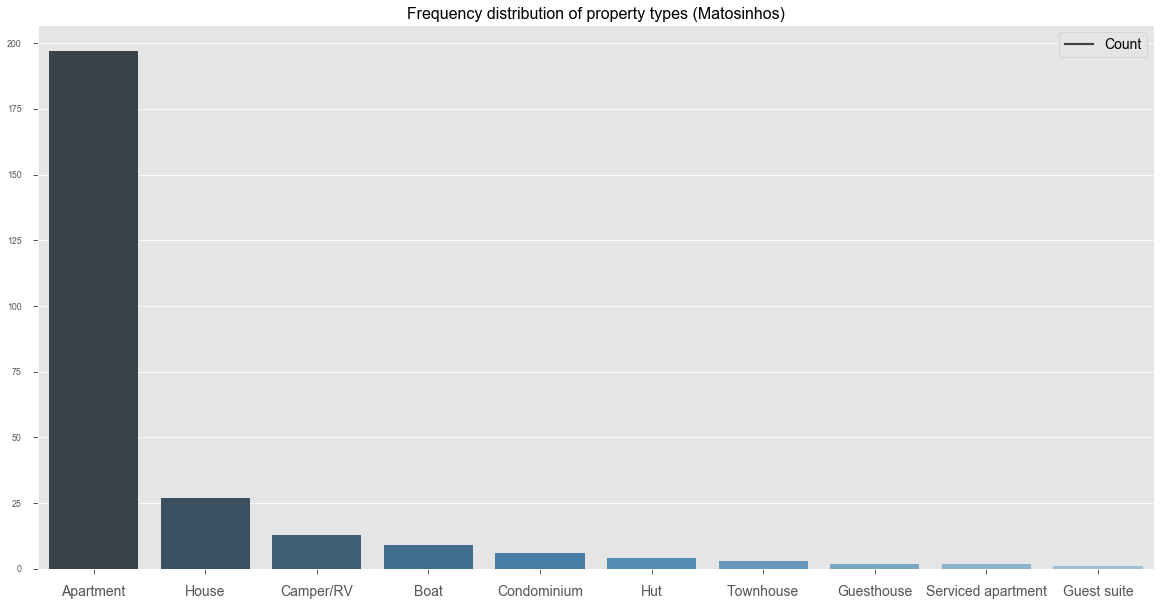

In [551]:
properties = df_matosinhos['property_type'].tolist()
fdist2 = FreqDist(properties)
prop2 = pd.DataFrame({'Property': list(fdist2.keys()),'Count': list(fdist2.values())})
prop2 = prop2.nlargest(columns='Count', n = 10)

plt.figure(figsize=(20,10))


ax = sns.barplot(x='Property',y='Count', data = prop2, palette=("Blues_d"))

ax.set_alpha(0.8)
ax.set_title('Frequency distribution of property types (Matosinhos)', fontsize=16)
ax.set_xticklabels(prop2['Property'], fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(['Count'], fontsize=14)

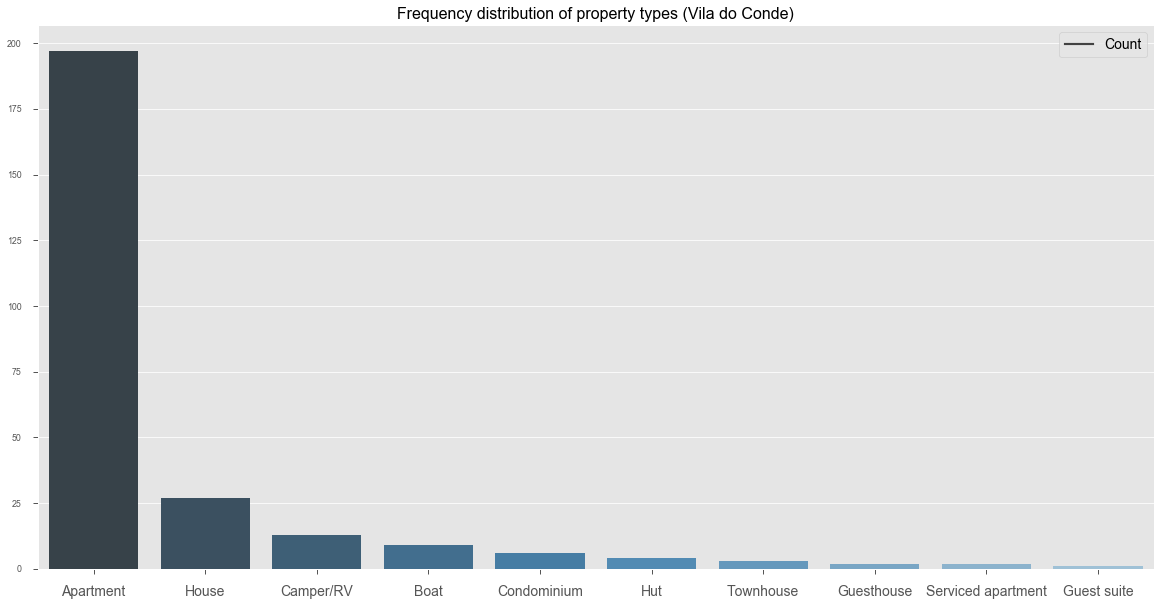

In [552]:
properties = df_viladoconde['property_type'].tolist()
fdist3 = FreqDist(properties)
prop3 = pd.DataFrame({'Property': list(fdist3.keys()),'Count': list(fdist3.values())})
prop3 = prop2.nlargest(columns='Count', n = 10)

plt.figure(figsize=(20,10))


ax = sns.barplot(x='Property',y='Count', data = prop3, palette=('Blues_d'))

ax.set_alpha(0.8)
ax.set_title('Frequency distribution of property types (Vila do Conde)', fontsize=16)
ax.set_xticklabels(prop2['Property'], fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(['Count'], fontsize=14)

According to the two charts above, 'Apartment' is the most common type of property.

So, we select only the apartments.

In [553]:
#Select only apartaments

df_matosinhos = df_matosinhos[df_matosinhos['property_type'] == 'Apartment']
df_viladoconde = df_viladoconde[df_viladoconde['property_type'] == 'Apartment']

#Delete NaN para avaliar as reviews
df_matosinhos = df_matosinhos.dropna()
df_viladoconde = df_viladoconde.dropna()


Text(0.5, 0, '')

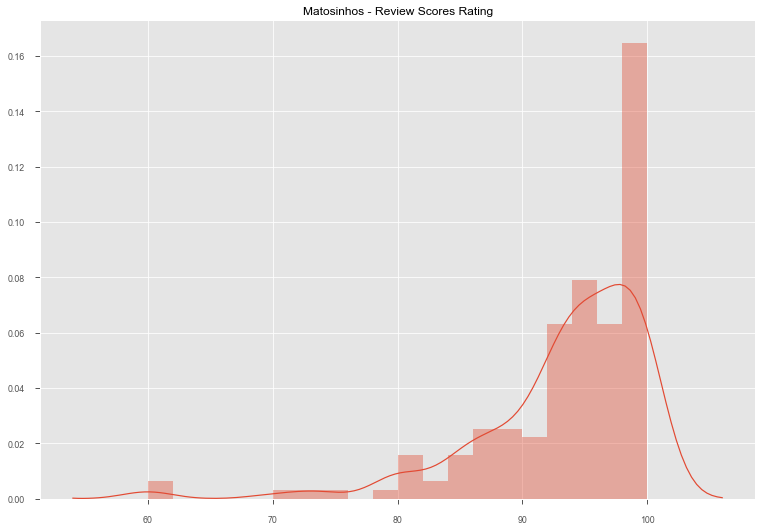

In [554]:
ax=sns.distplot(df_matosinhos['review_scores_rating'], bins=20)
ax.set_title('Matosinhos - Review Scores Rating', fontsize=12)
ax.set_xlabel('')

Text(0.5, 0, '')

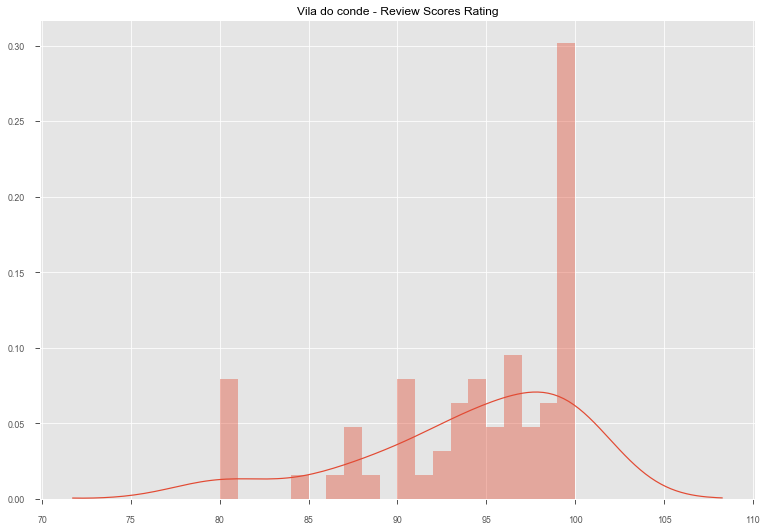

In [555]:
ax = sns.distplot(df_viladoconde['review_scores_rating'], bins=20)
ax.set_title('Vila do conde - Review Scores Rating', fontsize=12)
ax.set_xlabel('')

In [556]:
#Select only apartaments with review score rating equal 100

df_matosinhos = df_matosinhos[df_matosinhos['review_scores_rating'] == 100]
df_viladoconde = df_viladoconde[df_viladoconde['review_scores_rating'] == 100]

#Select only apartaments with accomodates 3 guests

df_matosinhos = df_matosinhos[df_matosinhos['accommodates'] >= 3]
df_viladoconde = df_viladoconde[df_viladoconde['accommodates'] >= 3]

In [557]:
#Prices by guest - Matosinhos

df_matosinhos['prices/guest'] = (df_matosinhos['price']+df_matosinhos['extra_people'])/(df_matosinhos['guests_included']+1)
df_matosinhos[['id','beds','bedrooms','maximum_nights','cancellation_policy', 'prices/guest']].sort_values('prices/guest')

id  beds  bedrooms  maximum_nights          cancellation_policy  \
8829   33508910   3.0       1.0            1125                     moderate   
10847  39226932   3.0       2.0             906                     moderate   
8382   32087837   3.0       2.0             120  strict_14_with_grace_period   
11764  42330725   3.0       2.0              30                     flexible   
10503  37901286   2.0       1.0              31                     moderate   
11071  40024882   2.0       2.0             365  strict_14_with_grace_period   
10545  38041996   2.0       1.0            1125                     moderate   
9870   36166471   3.0       3.0            1125                     moderate   
5663   23837028   2.0       2.0              90  strict_14_with_grace_period   
9993   36525996   2.0       2.0            1125                     flexible   
7594   29334396   2.0       1.0            1125  strict_14_with_grace_period   
3249   17588597   2.0       1.0            1125                     moderate   
5988   24536413   2.0       1.0            1125  strict_14_with_grace_period   
6833   26912527   2.0       1.0              30                     moderate   
7998   30786764   3.0       2.0            1125                     flexible   
10722  38767589   2.0       2.0              30                     moderate   
859     5852359   2.0       2.0            1125  strict_14_with_grace_period   
10375  37514988   2.0       1.0            1125                     flexible   
9679   35761379   5.0       3.0            1125                     flexible   

       prices/guest  
8829      10.500000  
10847     12.400000  
8382      13.750000  
11764     21.666667  
10503     21.666667  
11071     22.500000  
10545     25.000000  
9870      26.666667  
5663      27.500000  
9993      27.500000  
7594      28.666667  
3249      30.000000  
5988      30.000000  
6833      30.000000  
7998      37.500000  
10722     38.500000  
859       42.500000  
10375     45.000000  
9679      45.000000

In [558]:
#Prices by guest - Vila do conde

df_viladoconde['prices/guest'] = (df_viladoconde['price']+df_viladoconde['extra_people'])/(df_viladoconde['guests_included']+1)
df_viladoconde[['id','beds','bedrooms','maximum_nights','cancellation_policy', 'prices/guest']].sort_values('prices/guest')

id  beds  bedrooms  maximum_nights          cancellation_policy  \
6135   24960623   4.0       2.0             300  strict_14_with_grace_period   
4709   20980659   3.0       1.0               7                     flexible   
10955  39600969   1.0       1.0              30                     moderate   
4622   20710821   3.0       2.0             150                     moderate   
1976   12560419   2.0       2.0            1125                     moderate   
8983   33932455   2.0       1.0              30  strict_14_with_grace_period   
1460    8708415   2.0       2.0            1125                     moderate   
3007   16697677   2.0       1.0            1125  strict_14_with_grace_period   
6207   25152926   3.0       2.0            1124  strict_14_with_grace_period   
2679   15090560   0.0       2.0            1125  strict_14_with_grace_period   
5480   23408377   4.0       3.0            1125                     flexible   
7208   27904876   2.0       2.0            1125                     flexible   
2602   14752735   3.0       2.0            1125                     flexible   
8997   33986751   2.0       2.0            1125                     flexible   

       prices/guest  
6135      16.666667  
4709      21.666667  
10955     23.333333  
4622      26.500000  
1976      27.500000  
8983      28.333333  
1460      32.500000  
3007      32.500000  
6207      36.000000  
2679      37.000000  
5480      43.000000  
7208      43.500000  
2602      45.000000  
8997      52.500000

In [559]:
#Cancellation policy = flexible or moderate
#Maximum_nights > 30
#Bedrooms >=2
#Price/guest <= 30

df_matosinhos_final = df_matosinhos[((df_matosinhos['cancellation_policy'] == 'flexible') | 
                               (df_matosinhos['cancellation_policy'] == 'moderate'))  &
                             (df_matosinhos['maximum_nights'] > 30) &
                             (df_matosinhos['bedrooms'] >= 2) &
                             (df_matosinhos['prices/guest'] <= 30)]

df_matosinhos_final

id                   neighbourhood_cleansed neighbourhood_group  \
9870   36166471  São Mamede de Infesta e Senhora da Hora          MATOSINHOS   
9993   36525996            Matosinhos e Leça da Palmeira          MATOSINHOS   
10847  39226932            Matosinhos e Leça da Palmeira          MATOSINHOS   

                        city   zipcode  latitude  longitude property_type  \
9870   São Mamede de Infesta      4465  41.18306   -8.62918     Apartment   
9993        Leça da Palmeira      4450  41.19487   -8.69144     Apartment   
10847             Matosinhos  4450-010  41.17981   -8.68333     Apartment   

             room_type  accommodates  bathrooms  bedrooms  beds  price  \
9870   Entire home/apt             5        2.0       3.0   3.0   70.0   
9993   Entire home/apt             4        3.0       2.0   2.0   55.0   
10847  Entire home/apt             7        2.0       2.0   3.0   57.0   

       guests_included  extra_people  minimum_nights  maximum_nights  \
9870                 2          10.0               2            1125   
9993                 1           0.0               3            1125   
10847                4           5.0              60             906   

       review_scores_rating  review_scores_accuracy  \
9870                  100.0                    10.0   
9993                  100.0                    10.0   
10847                 100.0                    10.0   

       review_scores_cleanliness  review_scores_checkin  \
9870                        10.0                   10.0   
9993                        10.0                   10.0   
10847                       10.0                   10.0   

       review_scores_communication  review_scores_location  \
9870                           8.0                     8.0   
9993                          10.0                    10.0   
10847                         10.0                    10.0   

       review_scores_value cancellation_policy  prices/guest  
9870                   8.0            moderate     26.666667  
9993                  10.0            flexible     27.500000  
10847                 10.0            moderate     12.400000

In [560]:
#Cancellation policy = flexible or moderate
#Maximum_nights > 30
#Bedrooms >=2
#Price/guest <= 30 (total by night < 100)

df_viladoconde_final = df_viladoconde[((df_viladoconde['cancellation_policy'] == 'flexible') | 
                               (df_viladoconde['cancellation_policy'] == 'moderate'))  &
                             (df_viladoconde['maximum_nights'] > 30) &
                             (df_viladoconde['bedrooms'] >= 2) &
                             (df_viladoconde['prices/guest'] <= 30)]

df_viladoconde_final

id neighbourhood_cleansed neighbourhood_group  \
1976  12560419                 Árvore       VILA DO CONDE   
4622  20710821          Vila do Conde       VILA DO CONDE   

                       city   zipcode  latitude  longitude property_type  \
1976  Árvore, Vila do Conde  4480-113  41.33326   -8.72321     Apartment   
4622          Vila do Conde      4480  41.36160   -8.75744     Apartment   

            room_type  accommodates  bathrooms  bedrooms  beds  price  \
1976  Entire home/apt             5        2.0       2.0   2.0   55.0   
4622  Entire home/apt             5        1.5       2.0   3.0   43.0   

      guests_included  extra_people  minimum_nights  maximum_nights  \
1976                1           0.0               3            1125   
4622                1          10.0               2             150   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1976                 100.0                    10.0                       10.0   
4622                 100.0                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
1976                   10.0                         10.0   
4622                   10.0                         10.0   

      review_scores_location  review_scores_value cancellation_policy  \
1976                    10.0                 10.0            moderate   
4622                    10.0                 10.0            moderate   

      prices/guest  
1976          27.5  
4622          26.5

Applying all the conditions, df_final was created with only 5 properties, being 3 in Matosinhos and 2 in Vila do Conde.

In [561]:
df_final = pd.concat([df_matosinhos_final, df_viladoconde_final], ignore_index=True)
df_final

id                   neighbourhood_cleansed neighbourhood_group  \
0  36166471  São Mamede de Infesta e Senhora da Hora          MATOSINHOS   
1  36525996            Matosinhos e Leça da Palmeira          MATOSINHOS   
2  39226932            Matosinhos e Leça da Palmeira          MATOSINHOS   
3  12560419                                   Árvore       VILA DO CONDE   
4  20710821                            Vila do Conde       VILA DO CONDE   

                    city   zipcode  latitude  longitude property_type  \
0  São Mamede de Infesta      4465  41.18306   -8.62918     Apartment   
1       Leça da Palmeira      4450  41.19487   -8.69144     Apartment   
2             Matosinhos  4450-010  41.17981   -8.68333     Apartment   
3  Árvore, Vila do Conde  4480-113  41.33326   -8.72321     Apartment   
4          Vila do Conde      4480  41.36160   -8.75744     Apartment   

         room_type  accommodates  bathrooms  bedrooms  beds  price  \
0  Entire home/apt             5        2.0       3.0   3.0   70.0   
1  Entire home/apt             4        3.0       2.0   2.0   55.0   
2  Entire home/apt             7        2.0       2.0   3.0   57.0   
3  Entire home/apt             5        2.0       2.0   2.0   55.0   
4  Entire home/apt             5        1.5       2.0   3.0   43.0   

   guests_included  extra_people  minimum_nights  maximum_nights  \
0                2          10.0               2            1125   
1                1           0.0               3            1125   
2                4           5.0              60             906   
3                1           0.0               3            1125   
4                1          10.0               2             150   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                 100.0                    10.0                       10.0   
1                 100.0                    10.0                       10.0   
2                 100.0                    10.0                       10.0   
3                 100.0                    10.0                       10.0   
4                 100.0                    10.0                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                          8.0                     8.0   
1                   10.0                         10.0                    10.0   
2                   10.0                         10.0                    10.0   
3                   10.0                         10.0                    10.0   
4                   10.0                         10.0                    10.0   

   review_scores_value cancellation_policy  prices/guest  
0                  8.0            moderate     26.666667  
1                 10.0            flexible     27.500000  
2                 10.0            moderate     12.400000  
3                 10.0            moderate     27.500000  
4                 10.0            moderate     26.500000

Here are the final list of the selected properties to be analyzed by the person.

In [567]:
df_id = df_all[['id', 'listing_url']]
df_id = df_id.loc[df_all['id'].isin(df_final['id'])]
df_id

id                            listing_url
1976   12560419  https://www.airbnb.com/rooms/12560419
4622   20710821  https://www.airbnb.com/rooms/20710821
9870   36166471  https://www.airbnb.com/rooms/36166471
9993   36525996  https://www.airbnb.com/rooms/36525996
10847  39226932  https://www.airbnb.com/rooms/39226932

## Conclusion

The purpose of this project was to identify Porto properties and neighborhoods to spend a month or two.
By calculating amenities density distribution from Foursquare data we have selected two neighborhoods that satisfy the requirements. Combining this result with airbnb dataset, a list of five properties was produced to be analyzed.

https://www.airbnb.com/rooms/12560419

https://www.airbnb.com/rooms/20710821

https://www.airbnb.com/rooms/36166471

https://www.airbnb.com/rooms/36525996

https://www.airbnb.com/rooms/39226932